# Code Snippet 1
Description: Code used to move a random number of images from one directory to another.
 
Note: This was used to select the 385 images from the LAION-400M dataset.

In [60]:
import os
import shutil
import random

def move_random_images(source_dir, destination_dir, num_images_to_move):
    # Get a list of all files in the source directory
    all_images = [f for f in os.listdir(source_dir) if f.endswith('.jpg') or f.endswith('.png')]

    # Randomly select the specified number of images
    selected_images = random.sample(all_images, min(num_images_to_move, len(all_images)))

    # Move the selected images to the destination directory
    for image in selected_images:
        source_path = os.path.join(source_dir, image)
        destination_path = os.path.join(destination_dir, image)
        shutil.move(source_path, destination_path)
        print(f'Moved: {image}')

# Replace these paths with your actual source and destination directories
source_directory = 'C:\\Users\\User\\FYP\\DownloadedImages\\LAION-400M\\doctorImagesFiltered'
destination_directory = 'C:\\Users\\User\\FYP\DownloadedImages\\LAION-400M\\doctorImageSubsetsForProcessing\\tmp'

# Specify the number of images you want to move
num_images_to_move = 385

# Call the function to move random images
move_random_images(source_directory, destination_directory, num_images_to_move)


Moved: 65.jpg
Moved: 2.jpg
Moved: 45.jpg
Moved: 12.jpg
Moved: 123.jpg
Moved: 170.jpg
Moved: 115.jpg
Moved: 179.jpg
Moved: 178.jpg
Moved: 132.jpg
Moved: 81.jpg
Moved: 192.jpg
Moved: 172.jpg
Moved: 84.jpg
Moved: 117.jpg
Moved: 129.jpg
Moved: 79.jpg
Moved: 18.jpg
Moved: 1.jpg
Moved: 21.jpg
Moved: 96.jpg
Moved: 32.jpg
Moved: 38.jpg
Moved: 93.jpg
Moved: 55.jpg
Moved: 35.jpg
Moved: 92.jpg
Moved: 155.jpg
Moved: 27.jpg
Moved: 191.jpg
Moved: 83.jpg
Moved: 133.jpg
Moved: 144.jpg
Moved: 88.jpg
Moved: 143.jpg
Moved: 39.jpg
Moved: 140.jpg
Moved: 151.jpg
Moved: 64.jpg
Moved: 118.jpg
Moved: 128.jpg
Moved: 15.jpg
Moved: 168.jpg
Moved: 94.jpg
Moved: 157.jpg
Moved: 0.jpg
Moved: 40.jpg
Moved: 97.jpg
Moved: 106.jpg
Moved: 48.jpg
Moved: 61.jpg
Moved: 112.jpg
Moved: 153.jpg
Moved: 87.jpg
Moved: 75.jpg
Moved: 67.jpg
Moved: 119.jpg
Moved: 114.jpg
Moved: 8.jpg
Moved: 108.jpg
Moved: 14.jpg
Moved: 131.jpg
Moved: 185.jpg
Moved: 53.jpg
Moved: 186.jpg
Moved: 134.jpg
Moved: 110.jpg
Moved: 166.jpg
Moved: 24.jpg
Moved

# Code Snippet 2
Description: Code used to determine which images have only a specified number of people in them and copy those images to another directoy.

Note: This was used to select the 97 images used for the Google Form.

In [27]:
import os
import dlib
import cv2
from ultralytics import YOLO
import torch

# source_dir = 'C:\\Users\\User\\FYP\\MidJourney\\Nurse'   
# source_dir = "C:\\Users\\User\\FYP\\StableDiffusion\\StableDiffusion\\stable-diffusion-webui\\outputs\\txt2img-images\\Doctor&Nurse(DPM++ 2M Karras)"
source_dir = "C:\\Users\\User\\FYP\\StableDiffusion\\StableDiffusion\\stable-diffusion-webui\\outputs\\txt2img-images\\2024-03-16"

all_images = [f for f in os.listdir(source_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Loading the YOLO model. This is downloaded automatically when run for the first time.
model = YOLO('yolov8n.pt')

person_images = []
confidence_threshold = 0.5
number_of_people = 2
# num_images = 97

for image in all_images:
    input_image_path = os.path.join(source_dir, image)
    image = dlib.load_rgb_image(input_image_path)
    # Making predictions
    predictions = model.predict(image, classes=0)

    scores = predictions[0].boxes.conf
    filtered_indices = torch.where(scores > confidence_threshold)[0]

    if len(filtered_indices) == number_of_people:
        person_images.append(image) 

# Randomly select the specified number of images
selected_images = person_images#random.sample(person_images, min(num_images, len(person_images)))

for imgIndex, image in enumerate(selected_images):
    # save_path = 'C:\\Users\\User\\FYP\\MidJourney\\Nurse1Person'
    save_path = "C:\\Users\\User\\FYP\\StableDiffusion\\StableDiffusion\\stable-diffusion-webui\\outputs\\txt2img-images\\result"   
    save_path = os.path.join(save_path,str(imgIndex)+".jpg")
    cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


0: 640x640 2 persons, 267.1ms
Speed: 6.0ms preprocess, 267.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 246.1ms
Speed: 5.0ms preprocess, 246.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 252.1ms
Speed: 5.0ms preprocess, 252.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 237.1ms
Speed: 5.0ms preprocess, 237.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 257.1ms
Speed: 6.0ms preprocess, 257.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 253.1ms
Speed: 6.0ms preprocess, 253.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 263.1ms
Speed: 6.0ms preprocess, 263.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 256.1ms
Speed: 5.0ms preprocess, 256.1ms inference, 3.0ms postprocess per 

In [10]:
import os
import dlib
import cv2
from deepface import DeepFace
import pandas as pd

source_dir = 'C:\\Users\\User\\FYP\\Dall-E\\GeneratedImages\\NurseFinalisedFiltering'  
data_csv_path = 'C:\\Users\\User\\FYP\\Dall-E\\GeneratedImages\\NurseFinalisedFiltering\\data.csv'   

# Load data.csv
data_csv = pd.read_csv(data_csv_path)
# Convert DataFrame to dictionary
data_csv = data_csv.to_dict(orient='records')

all_images = [f for f in os.listdir(source_dir) if f.endswith('.jpg') or f.endswith('.png')]

saved_images_data = []

imgIndex = 0
for image in all_images:
    image_name = image
    input_image_path = os.path.join(source_dir, image)
    image = dlib.load_rgb_image(input_image_path)

    # Using the mtcnn detector to detect faces in the image
    objs = DeepFace.analyze(image, enforce_detection=False,  detector_backend="mtcnn", silent=True)

    if len(objs) == 2:
        save_path = 'C:\\Users\\User\\FYP\\Dall-E\\GeneratedImages\\NurseFinalisedFilteringOrdered'
        save_path = os.path.join(save_path,str(imgIndex)+".jpg")
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

        image_index = next((index for index, item in enumerate(data_csv) if item.get('image_no') == int(image_name.split('.')[0])), None)
        saved_images_data.append(data_csv[image_index])
        imgIndex += 1

saved_images_data_csv = pd.DataFrame(saved_images_data)
saved_images_data_csv.to_csv('C:\\Users\\User\\FYP\\Dall-E\\GeneratedImages\\NurseFinalisedFilteringOrdered\\data.csv', index=False)

# Code Snippet 3

Description: Code used to load and process the data retrieved from the Google Forms

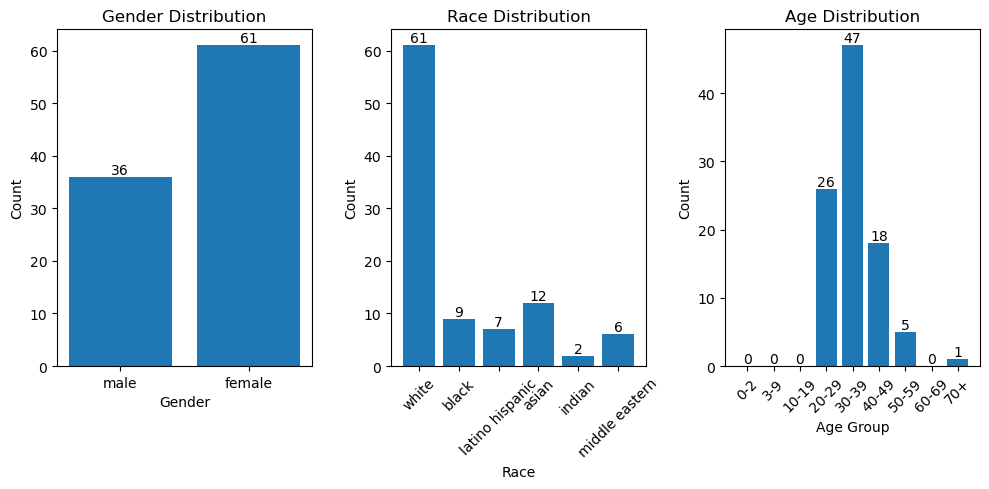

female is positively correlated with the image type.  0.6288659793814433  >  0.5
white is positively correlated with the image type.  0.6288659793814433  >  0.16666666666666666
20-29 is positively correlated with the image type.  0.26804123711340205  >  0.1111111111111111
30-39 is positively correlated with the image type.  0.4845360824742268  >  0.1111111111111111
40-49 is positively correlated with the image type.  0.18556701030927836  >  0.1111111111111111


In [67]:
# Note: The NAN values in the CSV file are present as those images were annotated by other users. 
# For instance image 0 was annoted by user 1 & 2 but image 25 was annoted by users 3 & 4 so 
# image 0 has NaN values for user 3 & 4 and image 25 has NaN values for user 1 & 2.

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# List of files containing the annotations
file_paths = ["..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Doctor-97\\GoogleFormResponses\\Doctor Annotation - 1 (Responses) - Form responses 1.csv",
"..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Doctor-97\\GoogleFormResponses\\Doctor Annotation - 2 (Responses) - Form responses 1.csv",
"..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Doctor-97\\GoogleFormResponses\\Doctor Annotation - 3 (Responses) - Form responses 1.csv",
"..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Doctor-97\\GoogleFormResponses\\Doctor Annotation - 4 (Responses) - Form responses 1.csv"]

# List of files containing the annotations
# file_paths = ["..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Nurse-97\\GoogleFormResponses\\Nurse Annotation - 1 (Responses) - Form responses 1.csv",
# "..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Nurse-97\\GoogleFormResponses\\Nurse Annotation - 2 (Responses) - Form responses 1.csv",
# "..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Nurse-97\\GoogleFormResponses\\Nurse Annotation - 3 (Responses) - Form responses 1.csv",
# "..\\DownloadedImages\\LAION-400M-GoogleForm-Images\\Nurse-97\\GoogleFormResponses\\Nurse Annotation - 4 (Responses) - Form responses 1.csv"]

def LoadAndProcessGoogleFormData(file_paths):
    """ 
    Description:
    This function loads the google form csv files, updates their column names and assigns a singular 
    result per attribute per image entry based on the most common value/averaging.
    
    Parameters:
    file_paths (list) - List containing the distance between the centers of the image and the center of the bounding box in each image.

    Returns:
    image_set_data (dict) - Dictionary containing the processed data for each image.
    """

    # Initialize an empty DataFrame to store the concatenated data
    df = pd.DataFrame()

    # Dictionary to store the image data
    image_set_data = {}

    # Loop through each CSV file and concatenate the DataFrames
    for index, csv_file in enumerate(file_paths):
        # Read a singular CSV file into a DataFrame
        part_df = pd.read_csv(csv_file)

        # Changing the column names for easier access
        # List of column names
        column_names = part_df.keys()

        column_mapping = {}
        column_mapping[column_names[1]] = "Gender_User"
        column_mapping[column_names[2]] = "Race_User"
        column_mapping[column_names[3]] = "Age_User"
        
        # Each file contains 25 images, so the image number is calculated by multiplying the index by 25
        image_number = index*25

        # Loop through the column names, starting from the 5th column and update the names accroding to the image with which the coencide
        for index in range(4,len(column_names),3):
            column_mapping[column_names[index]] = "Gender_"+str(image_number)
            column_mapping[column_names[index+1]] = "Race_"+str(image_number)
            column_mapping[column_names[index+2]] = "Age_"+str(image_number)
            image_number += 1

        # Rename the columns using the rename method
        part_df = part_df.rename(columns=column_mapping)
        df = pd.concat([df, part_df], ignore_index=True)

    # The number of images is calculated by subtracting 4 (Timestamp/Gender_User/Race_User/Age_User) 
    # from the total number of columns and then dividing by 3 (Number of labels for each image)
    number_of_images = int((len(df.keys())-4)/3)
    for image_index in range(0,number_of_images):
        image_data = {}
        image_data["age"] = list(df["Age_"+str(image_index)].dropna())
        image_data["gender"] = list(df["Gender_"+str(image_index)].dropna())
        image_data["race"] = list(df["Race_"+str(image_index)].dropna())
        image_set_data[image_index] = image_data

    for image_index in image_set_data:
        age = round(np.mean(image_set_data[image_index]["age"]))

        if age >= 0 and age <= 2: 
            age_label = "0-2"
        elif age >= 3 and age <= 9:
            age_label = "3-9"
        elif age >= 10 and age <= 19:
            age_label = "10-19"
        elif age >= 20 and age <= 29:
            age_label = "20-29"
        elif age >= 30 and age <= 39:
            age_label = "30-39"
        elif age >= 40 and age <= 49:
            age_label = "40-49"
        elif age >= 50 and age <= 59:
            age_label = "50-59"
        elif age >= 60 and age <= 69:
            age_label = "60-69"
        elif age >= 70:
            age_label = "70+"
        
        image_set_data[image_index]["age"] = age_label
        # Takes the most common value otherwise the first value
        image_set_data[image_index]["gender"] = Counter(image_set_data[image_index]["gender"]).most_common(1)[0][0] 
        image_set_data[image_index]["race"] = Counter(image_set_data[image_index]["race"]).most_common(1)[0][0]

    return image_set_data

def DisplayGoogleFormData(image_set_data):
    """ 
    Description:
    This Function displays the label counts across all images.
    
    Parameters:
    image_set_data (dict) - Dictionary containing the processed data for each image.

    Returns:
    None.
    """
    
    # Initialize the count dictionaries
    gender_count = {"male":0,"female":0}
    race_count = {"white":0,"black":0,"latino hispanic":0,"asian":0,"indian":0,"middle eastern":0}
    age_count = {"0-2":0,"3-9":0,"10-19":0,"20-29":0,"30-39":0,"40-49":0,"50-59":0,"60-69":0,"70+":0}

    # Loop through the image set data and update the mappings
    for index in image_set_data: 
        age_count[image_set_data[index]["age"]] += 1
        gender_count[image_set_data[index]["gender"].lower()] += 1
        race_count[image_set_data[index]["race"].lower()] += 1

    # Plotting gender data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    bars = plt.bar(gender_count.keys(), gender_count.values())
    values = gender_count.values()
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

    # Plotting race data
    plt.subplot(1, 3, 2)
    bars = plt.bar(race_count.keys(), race_count.values())
    values = race_count.values()
    plt.title('Race Distribution')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

    # Plotting age data
    plt.subplot(1, 3, 3)
    bars = plt.bar(age_count.keys(), age_count.values())
    values = age_count.values()
    plt.title('Age Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Same Function from the main pipeline just altered to function with the google form data.
def CorrelationMetric(data):
    correlation_gender = {"male": 0, "female": 0}
    correlation_race = {"asian": 0, "white": 0, "middle eastern": 0, "indian": 0, "latino hispanic": 0, "black": 0}
    correlation_age = {"0-2":0,"3-9":0,"10-19":0,"20-29":0,"30-39":0,"40-49":0,"50-59":0,"60-69":0,"70+":0}
    count = len(data)
    dict_list = [correlation_gender, correlation_race, correlation_age]

    # Working out the number of each metric present across the set of images
    for index in range(len(data)):
        correlation_gender[data[index]["gender"].lower()] += 1

        correlation_race[data[index]["race"].lower()] += 1

        correlation_age[data[index]["age"]] += 1

    for dict in dict_list:
        for item in dict:
            # Divide all values in the dictionary by count
            dict[item] /= count
            if dict[item] > 1/len(dict):
                print(item, "is positively correlated with the image type. ",dict[item], " > ", 1/len(dict))


image_set_data = LoadAndProcessGoogleFormData(file_paths)
DisplayGoogleFormData(image_set_data)
CorrelationMetric(image_set_data)